In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing



In [11]:
housing = fetch_california_housing()

In [12]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [13]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [15]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


# Standardization 

Standardizing the MedInc feature 

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_medinc = scaler.fit_transform(df[['MedInc']])

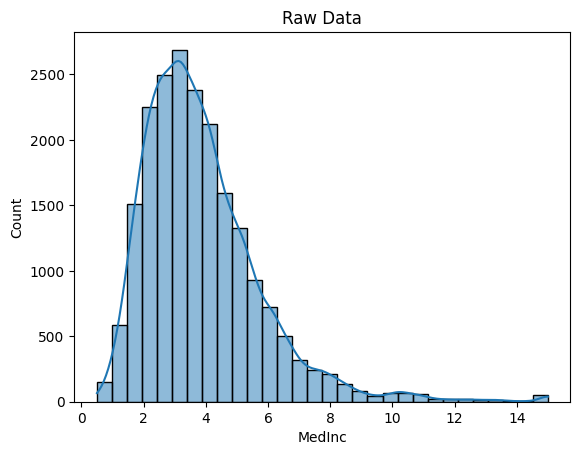

In [126]:
# Plotting Raw Data 
sns.histplot(data=df, x='MedInc', kde=True, bins=30)
plt.title('Raw Data')
plt.show()

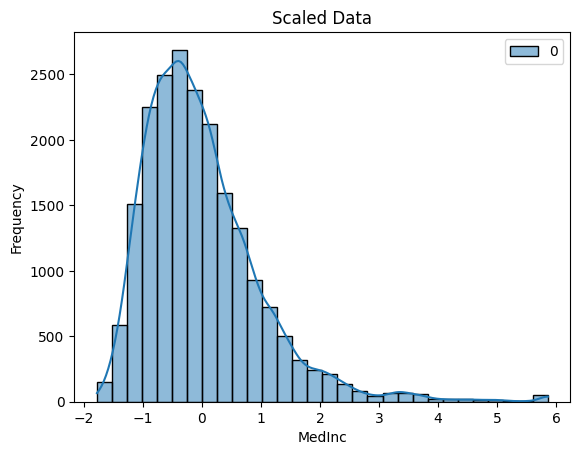

In [131]:
#Scaled data
sns.histplot(data=scaled_medinc, bins=30, kde=True)
plt.title('Scaled Data')
plt.xlabel("MedInc")
plt.ylabel('Frequency')
plt.show()

# Transform

1. Box-Cox Transform: Always use raw data for transforming. 

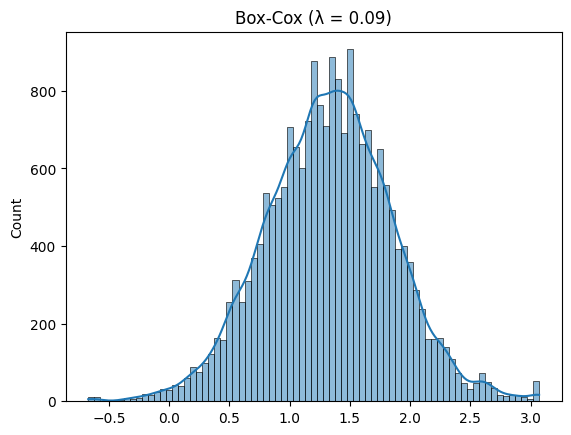

In [59]:
from scipy.stats import boxcox

boxcox_data, lambda_val = boxcox(df['MedInc'])

sns.histplot(boxcox_data, kde=True)
plt.title(f'Box-Cox (λ = {lambda_val:.2f})')
plt.show()

Now scale the transform data by using StandardScaler

In [68]:
df['BoxCox'] = boxcox_data
df['BoxCox_scaled'] = scaler.fit_transform(df[['BoxCox']])
pd.DataFrame(df[['BoxCox_scaled', 'BoxCox']]).head()

,BoxCox_scaled,BoxCox
0,1.916290,2.337069
1,1.909694,2.333598
2,1.601978,2.171690
3,1.035967,1.873879
4,0.198026,1.432988


In [70]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'BoxCox', 'BoxCox_scaled'],
      dtype='object')

In [81]:
# Dividing independent and dependent feature
X = df.iloc[:,1:8]
y = df.iloc[:,:1]


In [87]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape

(14448, 7)

In [88]:
X_test.shape

(6192, 7)

In [98]:
#Scaling the X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [101]:
# Model Import 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [116]:
#predictiong the value
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

Accuracy checking

In [123]:
from sklearn.metrics import mean_squared_error, r2_score

# Error and accuracy checking in test data
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Train data 
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'MSE_Test: { mse_test:.2f}')
print(f'R2 score_Test: {r2_test:.2f}')

print(f'MSE_Train: {mse_train:.2f}')
print(f'R2_score_train: {r2_train:.2f}')


MSE_Test: 1.47
R2 score_Test: 0.59
MSE_Train: 1.45
R2_score_train: 0.60
